# DS1.1 Midterm
### _Data Visualization and You._
--------
## Assignment:
* Create a presentation in a Jupyter Notebook using data visualizations and other techniques that allow non-technical team members to understand your findings. 
* Answer at least five questions about the dataset and explain any conclusions and actionables that result from this.
* Have a decent time figuring out how to manipulate datasets.

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('SAFeedback_Surveys_FINAL/2017/Student_Feedback_Surveys-Superview.csv')
df["Rating (Num)"] = df["Rating (Num)"].apply(lambda x: int(x) if (x != "#ERROR!") else 5)
# We Might as well take this opportunity to check out the data.
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## What Sorts of Information Does This Dataset Contain?
--------
### This datset contains a lot of very useful macro data about the program. In terms of raw performance and reception, we have most of the data we'd need to make judgement calls about:
    - What the overall reception of this program was
    - Which facilities require more atention
    - Which parts of the program need to be touched up
    - Which tracks need some love
--------
### Let's explore this data a bit further!

# On to the Questions!

## Getting the Net Promoter Store(NPS)
### NPS is calculated like so
---------------------------------------------
* First, it is separated into three categories:

    - Promoters (Ratings 9-10)
    - Passives (Rating 7-8)
    - Detractors (Rating1-6)

* Then we calculate the perentage of each category by dividing each category by the total responses.
* Finally, we subtract the detractors percentage from the promoters percentage.

In [107]:
#Here we do the first part, sorting things into categories.
df["NPS_Categories"] = df["Rating (Num)"].apply(lambda x: "Promoter" if (x >= 9) 
                                             else ("Detractor" if x <= 6 
                                              else "Passive"))

df["NPS_Categories"].value_counts()

Promoter     760
Passive      569
Detractor    124
Name: NPS_Categories, dtype: int64

In [108]:
#Now let's get those percentages. We're ignoring the Passives because they're not cool enough to matter.
Total = (760 + 569 + 124)
Promoters = 760
Detractors = 124
NPS = (Promoters - Detractors) / Total

In [109]:
#Now we get the NPS!
NPS

0.4377150722642808

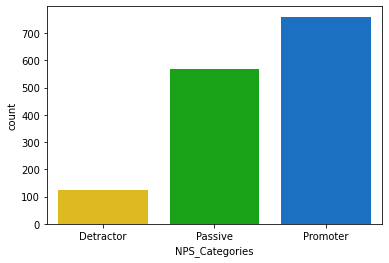

In [110]:
#For shits and giggles, let's visualize the responses. And let's make it pretty.
plt.show(sns.countplot(df["NPS_Categories"], palette = "nipy_spectral_r"))

## Which Track is the Most Popular?
### Calculating Track Popularity
----------------------------------
While we're dealing with Promoters and all that, we may as well take a peek at which track people liked the most.

In [121]:
#This really isn't hard. Just setting up a decent crosstab.
pd.crosstab(df["Track"], df["NPS_Categories"], normalize="index")

NPS_Categories,Detractor,Passive,Promoter
Track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


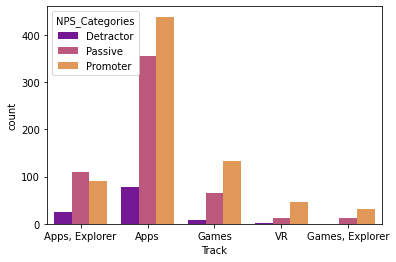

In [122]:
#Looks like 'VR' Track barely eked out a win! Let's get a graph going so we can see it more clearly.
plt.show(sns.countplot("Track", hue="NPS_Categories", data=df, palette = "plasma"))

## Satisfaction and Location: Are They Linked?
-----------
##### Reasonable Money is on yes.

In [123]:
#Another problem easily solvable with a crosstable, baby.
Location = pd.crosstab(df["Location"], df["NPS_Categories"], normalize="index")
Location

NPS_Categories,Detractor,Passive,Promoter
Location,,,
Atlanta,0.000000,0.272727,0.727273
Beijing,0.000000,0.320513,0.679487
Chicago,0.057143,0.414286,0.528571
Hong Kong,0.272727,0.636364,0.090909
Los Angeles,0.047170,0.311321,0.641509
New York City,0.106061,0.412121,0.481818
Oakland,0.042553,0.382979,0.574468
Redwood City,0.086207,0.396552,0.517241
San Francisco,0.086111,0.375000,0.538889


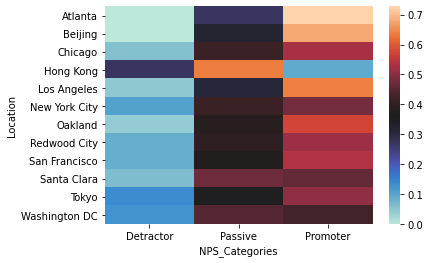

In [114]:
#Let's take a second to make everything easier on the eyes.
plt.show(sns.heatmap(Location, cmap="icefire"))

Man, students in Atlanta seemed _vastly_ more satisfied with the experience than most anywhere save Beijing. 

## Experience over time
-----------------
How does student experience shape up over the course of the program?

In [115]:
#How about we not mix it up and just go with the usual, eh?
pd.crosstab(df["Rating (Num)"], df["Week"])

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Rating (Num),,,,,,,,
0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,1,0,0
3,1,2,1,2,0,1,1,0
4,6,2,0,3,2,0,0,0
5,9,7,7,6,4,1,4,0
6,12,12,13,8,7,5,2,0
7,40,34,22,25,22,18,15,1
8,91,82,64,49,45,41,19,1


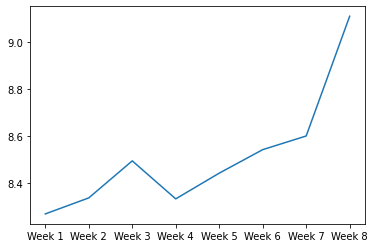

In [116]:
#Hmm, it looks like people fall off in interest a bit around weeks 3 and 4.
#Lets make this a bit more understandable.
Weeks = sorted(df["Week"].unique())
means = []
for week in weeks:
    means.append(df[df.Week == week]["Rating (Num)"].mean())
plt.show(sns.lineplot(weeks, means))

## What Questions _Can't_ We Answer With This Dataset
#### To reiterate, this Dataset is very good for Macro Data. What this lacks, however, is the micro data. We won't be able to use this to get into the smaller details like:
    - What exact parts of the track worked and what parts didn't?
    - What caused a dip in interest between weeks 3 and 4?
    - What did the Atlanta and Beijing locations do differently that caused their approval to be higher?
----------
#### Answering these questions would likely require more fine-tuned surveys, which leads me to the next part...

## Actionables and Conclusions
#### Based on the data we have here, and what we don't have, we can take the following actions:
    - The Atlanta and Beijing locations should be examined for what caused them to perform anomalously well.
    - The Hong Kong location should be investigated for the exact opposite reasons.
    - Additional surveys should be done to determine why there was a lack of interest in weeks 3-4.
    - The Tracks for Games, Apps, and Apps/Explorer need to be fine-tuned to raise interest and performance.

## Presentation in an Understandable Way
#### Presenting huge blocks of code to nontechnical individuals is always a bit of a problem. 
#### Programs like Jupyter Notebook allow us to visualize things a bit more clearly, and the use of graphs always helps. Beyond this, it wouldn't be _too_ difficult to present this data through a powerpoint presentation, so long as the graphs are clearly labled and visible.